In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# открываем файл
df = pd.read_csv('https://raw.githubusercontent.com/Lira-Ov/Innopolis-projects/main/dataset_tk.csv',  parse_dates=[0])

In [3]:
# выводим первые 5 строк
df.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-02-01,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-03-01,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-04-01,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-05-01,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-06-01,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


Набор данныхдемонстрирует ежедневное потребление электроэнергии в Индии, в зависимости от региона.

Данные представлены в виде временного ряда за 17 месяцев, со 2 января 2019 года по 23 мая 2020 года.


Строки индексируются датами, а столбцы представляют собой регионы.

In [4]:
# Переименуем столбец с датой
df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True )

In [5]:
# вывод информации о датасете
rows, cols = df.shape

print(f"В датасете {cols} колонок и {rows} строк")

В датасете 34 колонок и 503 строк


In [6]:
# вывод общей информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               503 non-null    datetime64[ns]
 1   Punjab             503 non-null    float64       
 2   Haryana            503 non-null    float64       
 3   Rajasthan          503 non-null    float64       
 4   Delhi              503 non-null    float64       
 5   UP                 503 non-null    float64       
 6   Uttarakhand        503 non-null    float64       
 7   HP                 503 non-null    float64       
 8   J&K                503 non-null    float64       
 9   Chandigarh         503 non-null    float64       
 10  Chhattisgarh       503 non-null    float64       
 11  Gujarat            503 non-null    float64       
 12  MP                 503 non-null    float64       
 13  Maharashtra        503 non-null    float64       
 14  Goa       

In [7]:
# проверка дубликатов
df.duplicated().sum()

0

Проверка показала что имеется 7 дубликатов, что составляет порядка 2% от общего объема датасета, полагаю их можно просто удалить

In [8]:
# избавляемся от дубликатов
df = df.drop_duplicates()

In [9]:
# проверка прорпусков
df.isna().sum()

Date                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

Пропуски в данных отсутствуют

In [10]:
# посмотрим описательные статистики
df.describe().T.sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Maharashtra,503.0,431.570179,42.252273,305.6,401.70,429.0,463.75,522.1
Gujarat,503.0,323.039563,38.499743,192.3,302.70,325.4,344.90,400.8
UP,503.0,314.036382,66.516960,186.8,263.65,290.0,370.55,471.8
Tamil Nadu,503.0,300.738569,35.458236,195.7,277.15,302.2,330.40,365.4
Rajasthan,503.0,218.443340,27.421615,105.8,205.80,222.9,237.60,278.0
MP,503.0,208.283101,31.081610,131.8,182.65,209.3,230.45,272.3
Karnataka,503.0,204.106759,30.152708,121.0,182.30,205.3,228.45,273.3
Telangana,503.0,187.008549,29.665708,130.5,165.30,181.8,210.80,256.2
Andhra Pradesh,503.0,176.151889,15.870266,130.6,163.80,174.5,191.00,205.1
Punjab,503.0,141.145527,56.977361,56.1,104.00,118.3,162.50,300.0


Видим что наибольшее ежедневное потребление в среднем в штатах - Maharashtra, Gujarat,	UP. Наименьшее ежедненвнное потребление в среднем в штатах Arunachal Pradesh, Mizoram, Sikkim, причем разница колоссальная. АВзглянем на совокупное потребление по годам

In [11]:
#разделяем данные по годам
df["Year"]=df['Date'].dt.year
df_2019 =  df['Year'] == 2019
df_2020 =  df['Year'] == 2020
dataset_2019 = df[df_2019]
dataset_2020 = df[df_2020]

In [12]:
# вывод информации о датасете
rows01, cols01 = dataset_2019.shape

print(f"В датасете 2019 - {cols01} колонок и {rows01} строк")

В датасете 2019 - 35 колонок и 359 строк


In [13]:
# вывод информации о датасете
rows02, cols02 = dataset_2020.shape

print(f"В датасете 2020 - {cols02} колонок и {rows02} строк")

В датасете 2020 - 35 колонок и 144 строк


In [14]:
# добавляем сумму
df.loc['Total',:]= df.sum(axis=0)
dataset_2019.loc['Total_2019',:]= dataset_2019.sum(axis=0)
dataset_2020.loc['Total_2020',:]= dataset_2020.sum(axis=0)

<ipython-input-14-e211d6e7f61f>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc['Total',:]= df.sum(axis=0)
<ipython-input-14-e211d6e7f61f>:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_2019.loc['Total_2019',:]= dataset_2019.sum(axis=0)
<ipython-input-14-e211d6e7f61f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2019.lo

In [15]:
# создаем сводную таблицу по годам
total_df = dataset_2019['Total_2019':]
total_df_2020 = dataset_2020['Total_2020':]
total_df = total_df.append(total_df_2020)
total_df.loc['Total',:]= total_df.sum(axis=0)
total_df = total_df.drop(columns = ['Year', 'Date'],axis = 1)

<ipython-input-15-9b671036ef44>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df = total_df.append(total_df_2020)
<ipython-input-15-9b671036ef44>:5: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_df.loc['Total',:]= total_df.sum(axis=0)


In [16]:
# Выводим сводную таблицу на печать
total_df

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Total_2019,49635.7,48995.0,78138.8,29458.3,112689.9,12898.6,9490.8,15915.3,1472.4,30179.9,...,28966.6,49868.7,466.4,754.0,8979.4,894.6,2018.1,614.3,776.8,1482.5
Total_2020,21360.5,20586.8,31738.2,12482.2,45270.4,5288.4,3873.0,6349.5,610.8,12010.3,...,11507.1,19901.5,182.2,306.9,3575.5,360.2,820.7,244.0,310.9,572.5
Total,70996.2,69581.8,109877.0,41940.5,157960.3,18187.0,13363.8,22264.8,2083.2,42190.2,...,40473.7,69770.2,648.6,1060.9,12554.9,1254.8,2838.8,858.3,1087.7,2055.0


In [17]:
# для удобства расчетов транспонируем исходную таблицу и отсортируем по потреблению
total_df = total_df.T.sort_values(by='Total',ascending=False)

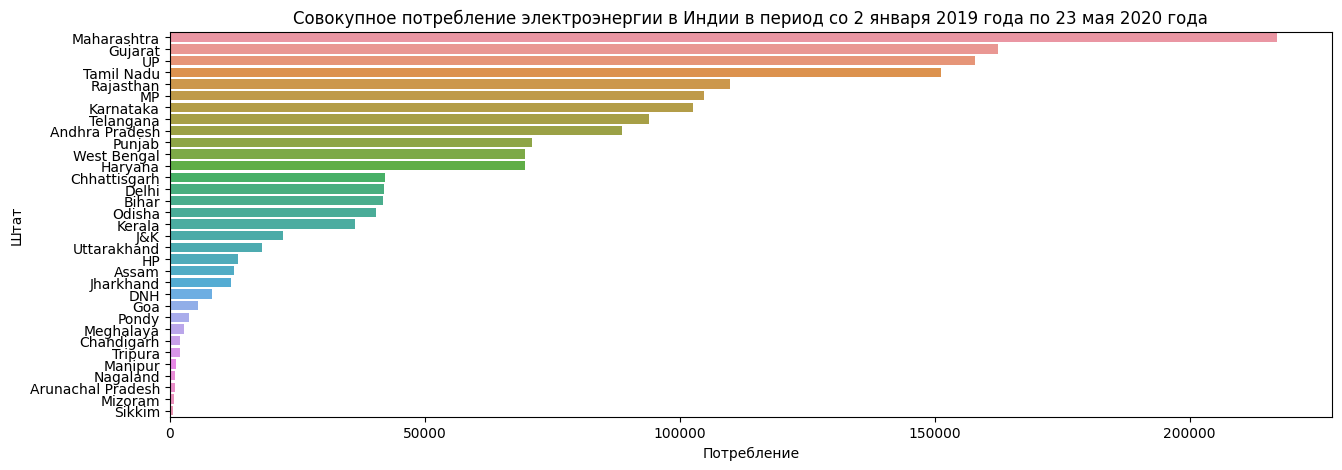

In [18]:
# визуализируем данные
plt.figure(figsize=(15, 5))
sns.barplot(x="Total",y=total_df.index,data=total_df)
plt.title('Совокупное потребление электроэнергии в Индии в период со 2 января 2019 года по 23 мая 2020 года')
plt.xlabel("Потребление")
plt.ylabel("Штат")
plt.show()


В лидерах, как мы и выяснили по средним значениям штаты Maharashtra, Gujarat, UP. Наименьшее в штатах Arunachal Pradesh, Mizoram, Sikkim


Посмотрим динамику потребления электроэнергии в топ-5 регионах, и в 5 наименее энергозатратных регионах

In [19]:
# cгрупиируем данные по месяцам
df = df.drop(['Total'],axis = 0)
df.set_index('Date', inplace=True)
data_resample=df.resample('MS').sum()
data_resample.reset_index(inplace=True)

In [20]:
# визуализируем потребление в топ-5 штатах
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Maharashtra'], mode='lines',
                         name='Maharashtra'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Gujarat'], mode='lines',
                         name='Gujarat'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['UP'], mode='lines',
                         name='UP'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Tamil Nadu'], mode='lines',
                         name='Tamil Nadu'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Rajasthan'], mode='lines',
                         name='Rajasthan'))
fig.update_layout(title='Динамика потребления электроэнергии в наиболее энергозатратных регионах')


Мы видим что в целом энергопотребление остается на уровне,  и только в штате UP заметно увеличение потребления с марта 2020

In [21]:
# визуализируем потребление в наименее энергозатратных штатах
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Manipur'], mode='lines',
                         name='Manipur'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Nagaland'], mode='lines',
                         name='Nagaland'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Arunachal Pradesh'], mode='lines',
                         name='Arunachal Pradesh'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Mizoram'], mode='lines',
                         name='Mizoram'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=df['Sikkim'], mode='lines',
                         name='Sikkim'))
fig.update_layout(title='Динамика потребления электроэнергии в наименее энергозатратных регионах')

Видим что потребление ээ без особых скачков, и только штат Sikkim показывает стабильную динамику снижения потребления. Рискну предположить что это наименее развитый регион, из которого постепенно уезжают жители